In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
import sys
sys.path.insert(0, '../src/')
from models.stock_model import Stock
from api.lobster_api import stock_api
from api.technical_analysis import TechnicalAnalysis
from postgres_db import PostgresDB

In [3]:
stock_df = PostgresDB.table_to_df('stock')
stock_df

,symbol,code,company,headquarters,sector,sub_sector,year
0,IBM,51143,IBM,"Armonk, New York",Information Technology,IT Consulting & Other Services,1911
1,AAPL,320193,Apple Inc.,"Cupertino, California",Information Technology,"Technology Hardware, Storage & Peripherals",1977
2,MSFT,789019,Microsoft,"Redmond, Washington",Information Technology,Systems Software,1975
3,TSLA,1318605,"Tesla, Inc.","Austin, Texas",Consumer Discretionary,Automobile Manufacturers,2003
4,TJX,109198,TJX Companies,"Framingham, Massachusetts",Consumer Discretionary,Apparel Retail,1987
...,...,...,...,...,...,...,...
495,YUM,1041061,Yum! Brands,"Louisville, Kentucky",Consumer Discretionary,Restaurants,1997
496,ZBRA,877212,Zebra Technologies,"Lincolnshire, Illinois",Information Technology,Electronic Equipment & Instruments,1969
497,ZBH,1136869,Zimmer Biomet,"Warsaw, Indiana",Health Care,Health Care Equipment,1927
498,ZION,109380,Zions Bancorporation,"Salt Lake City, Utah",Financials,Regional Banks,1873


## Moving Averages

In [4]:
m_stock, m_income_reports_df, m_quotes_df = stock_api.stock_model(symbol='AAPL')

In [5]:
m_quotes_df['date'] = m_quotes_df['date'].astype({'date': 'datetime64[ns]'})
m_quotes_df.sort_values(by="date", ascending=True, inplace=True)
m_quotes_df

,id,symbol,date,open,high,low,close,adjustedClose,volume,dividend,splitCoeff
5822,None,AAPL,1999-11-01,80.000,80.690,77.370,77.62,0.590684,2487300.0,0.0,1.0
5821,None,AAPL,1999-11-02,78.000,81.690,77.310,80.25,0.610698,3564600.0,0.0,1.0
5820,None,AAPL,1999-11-03,81.620,83.250,81.000,81.50,0.620210,2932700.0,0.0,1.0
5819,None,AAPL,1999-11-04,82.060,85.370,80.620,83.62,0.636344,3384700.0,0.0,1.0
5818,None,AAPL,1999-11-05,84.620,88.370,84.000,88.31,0.672034,3721500.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4,None,AAPL,2022-12-14,145.350,146.655,141.160,143.21,143.210000,82291182.0,0.0,1.0
3,None,AAPL,2022-12-15,141.110,141.800,136.025,136.50,136.500000,98931907.0,0.0,1.0
2,None,AAPL,2022-12-16,136.685,137.650,133.730,134.51,134.510000,160156900.0,0.0,1.0
1,None,AAPL,2022-12-19,135.110,135.200,131.320,132.37,132.370000,79592614.0,0.0,1.0


# Moving Averages

In [6]:
df_stock_moving_averages = TechnicalAnalysis.moving_averages(m_quotes_df[['date', 'symbol', 'adjustedClose']])
df_stock_moving_averages

,date,symbol,adjustedClose,year,sma_20,sma_200,ema_20,ema_200,cum_ma
5623,2000-08-15,AAPL,0.710617,2000,0.749153,0.811769,0.766600,0.811832,0.811769
5622,2000-08-16,AAPL,0.738165,2000,0.745965,0.812507,0.765246,0.811253,0.811403
5621,2000-08-17,AAPL,0.782911,2000,0.743157,0.813368,0.766087,0.811031,0.811262
5620,2000-08-18,AAPL,0.760994,2000,0.740448,0.814071,0.765845,0.810640,0.811014
5619,2000-08-21,AAPL,0.768604,2000,0.741825,0.814733,0.765976,0.810312,0.810806
...,...,...,...,...,...,...,...,...,...
4,2022-12-14,AAPL,143.210000,2022,146.308500,152.736496,146.126022,145.523507,28.367617
3,2022-12-15,AAPL,136.500000,2022,145.694000,152.589946,145.667640,145.478614,28.386197
2,2022-12-16,AAPL,134.510000,2022,144.883500,152.435087,145.136324,145.424044,28.404428
1,2022-12-19,AAPL,132.370000,2022,143.937500,152.284760,144.528403,145.359098,28.422285


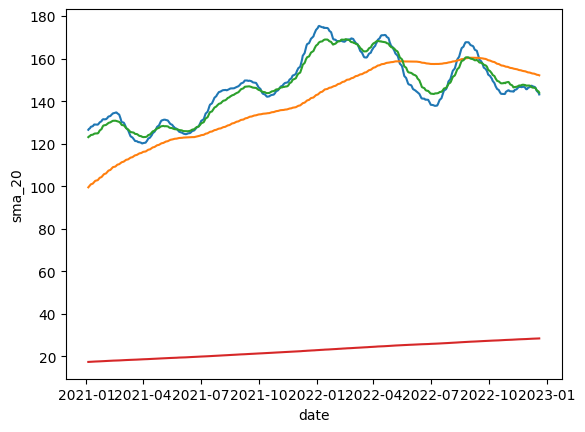

In [7]:
#sns.lineplot(data=df_stock_moving_averages[df_stock_moving_averages['date'].dt.year > 2020], x='date', y='adjustedClose')
sns.lineplot(data=df_stock_moving_averages[df_stock_moving_averages['date'].dt.year > 2020], x='date', y='sma_20')
sns.lineplot(data=df_stock_moving_averages[df_stock_moving_averages['date'].dt.year > 2020], x='date', y='sma_200')
sns.lineplot(data=df_stock_moving_averages[df_stock_moving_averages['date'].dt.year > 2020], x='date', y='ema_20')
sns.lineplot(data=df_stock_moving_averages[df_stock_moving_averages['date'].dt.year > 2020], x='date', y='cum_ma')
plt.show()

# Bollinger Bands

In [8]:
df_bollinger_bands = TechnicalAnalysis.bollinger_bands(m_quotes_df[['date', 'symbol', 'adjustedClose']])
df_bollinger_bands

,date,symbol,adjustedClose,year,standard_dev,sma_20,bollinger_upper,bollinger_lower
5803,1999-11-29,AAPL,0.719596,1999,0.037819,0.681958,0.757596,0.606319
5802,1999-11-30,AAPL,0.744785,1999,0.033938,0.689663,0.757538,0.621788
5801,1999-12-01,AAPL,0.784281,1999,0.034818,0.698342,0.767978,0.628706
5800,1999-12-02,AAPL,0.838540,1999,0.042079,0.709258,0.793417,0.625100
5799,1999-12-03,AAPL,0.875144,1999,0.052328,0.721198,0.825853,0.616543
...,...,...,...,...,...,...,...,...
4,2022-12-14,AAPL,143.210000,2022,3.308360,146.308500,152.925219,139.691781
3,2022-12-15,AAPL,136.500000,2022,3.882019,145.694000,153.458039,137.929961
2,2022-12-16,AAPL,134.510000,2022,4.405022,144.883500,153.693545,136.073455
1,2022-12-19,AAPL,132.370000,2022,4.928136,143.937500,153.793773,134.081227


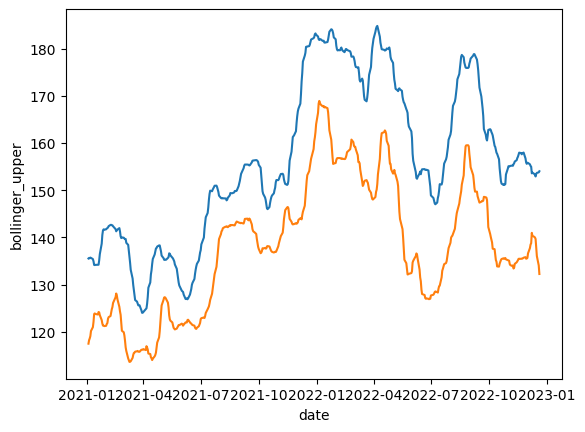

In [9]:
# Plotting it all together
sns.lineplot(data=df_bollinger_bands[df_bollinger_bands['year']>2020], x='date', y='bollinger_upper')
sns.lineplot(data=df_bollinger_bands[df_bollinger_bands['year']>2020], x='date', y='bollinger_lower')
plt.show()

# Relative Strength Index
https://www.roelpeters.be/many-ways-to-calculate-the-rsi-in-python-pandas/

In [10]:
df_rsi_calc = TechnicalAnalysis.rsi_calc(m_quotes_df[['date', 'symbol', 'adjustedClose']])
df_rsi_calc

,date,symbol,adjustedClose,rsi
5808,1999-11-19,AAPL,0.703463,67.268416
5807,1999-11-22,AAPL,0.689613,61.714777
5806,1999-11-23,AAPL,0.706279,65.414875
5805,1999-11-24,AAPL,0.720586,68.251510
5804,1999-11-26,AAPL,0.723401,68.793987
...,...,...,...,...
4,2022-12-14,AAPL,143.210000,46.309633
3,2022-12-15,AAPL,136.500000,37.928952
2,2022-12-16,AAPL,134.510000,35.856470
1,2022-12-19,AAPL,132.370000,33.722515


"""
#df[“price_change”] = df[“close”] – df[“open”]
#df[“up_move”] = df[“price_change”].apply(lambda x: x if x > 0 else 0)
#df[“down_move”] = df[“price_change”].apply(lambda x: abs(x) if x < 0 else 0)
#df["avg_up"] = df["up_move"].ewm(span=27).mean()
#df["avg_down"] = df["down_move"].ewm(span=27).mean()
#df["RS"] = df["avg_up"]/df["avg_down"]
#df["RSI"] = df["RS"].apply(lambda x: 100-(100/(x+1)))
"""

# Query Databases and Create Technical Analytics Parameters and persist in a database.

In [12]:
def compute_tech_analytics_for_stocks():
    for index, stock_symbol in enumerate(stock_df['symbol'].to_list()):
        print('Symbol - ', index, '. ', stock_symbol)
        try:
            # Stock Quotes
            json = PostgresDB.query_to_df("select * from stock_historical_quote where symbol = '" + stock_symbol + "'" )['historical_quote'].iloc[0]
            temp_quote_df = pd.read_json(json)[['symbol', 'date', 'open', 'high', 'low', 'close', 'adjustedClose', 'volume']]
            temp_quote_df['date'] = temp_quote_df['date'].astype({'date': 'datetime64[ns]'})
            df = temp_quote_df[['date', 'symbol', 'adjustedClose']]
            # Temp Dataframes for TechnicalAnalysis
            temp_stock_moving_averages = TechnicalAnalysis.moving_averages(df)[['date', 'symbol', 'sma_20', 'sma_200', 'ema_20', 'ema_200', 'cum_ma', 'adjustedClose']]
            temp_bollinger_bands = TechnicalAnalysis.bollinger_bands(df)[['date', 'symbol', 'bollinger_upper', 'bollinger_lower']]
            temp_rsi_calc = TechnicalAnalysis.rsi_calc(df)[['date', 'symbol', 'rsi']]
            # Return TechnicalAnalysis Dataframe
            tech_analytics_df =  temp_stock_moving_averages.merge(temp_bollinger_bands, on=['date', 'symbol']).merge(temp_rsi_calc, on=['date', 'symbol'])
            PostgresDB.df_to_table(tech_analytics_df, 'technical_analysis')
            print('Symbol ', stock_symbol, ' Complete.')
        except:
            print('Symbol ', stock_symbol, ' Errored.')

In [ ]:
#compute_tech_analytics_for_stocks()

Symbol  IBM  Complete.
Symbol  AAPL  Complete.
Symbol  MSFT  Complete.
Symbol  TSLA  Complete.
Symbol  TJX  Complete.
Symbol  MMM  Complete.
Symbol  AOS  Complete.
Symbol  ABT  Complete.
Symbol  ABBV  Complete.
Symbol  ABMD  Complete.
Symbol  ACN  Complete.
Symbol  ATVI  Complete.
Symbol  ADM  Complete.
Symbol  ADBE  Complete.
Symbol  ADP  Complete.
Symbol  AAP  Complete.
Symbol  AES  Complete.
Symbol  AFL  Complete.
Symbol  A  Complete.
Symbol  APD  Complete.
Symbol  AKAM  Complete.
Symbol  ALK  Complete.
Symbol  ALB  Complete.
Symbol  ARE  Complete.
Symbol  ALGN  Complete.
Symbol  ALLE  Complete.
Symbol  LNT  Complete.
Symbol  ALL  Complete.
Symbol  GOOGL  Complete.
Symbol  GOOG  Complete.
Symbol  MO  Complete.
Symbol  AMZN  Complete.
Symbol  AMCR  Complete.
Symbol  AMD  Complete.
Symbol  AEE  Complete.
Symbol  AAL  Complete.
Symbol  AEP  Complete.
Symbol  AXP  Complete.
Symbol  AIG  Complete.
Symbol  AMT  Complete.
Symbol  AWK  Complete.
Symbol  AMP  Complete.
Symbol  ABC  Complete.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=47acbe2e-cf49-4a5d-8910-b2139b3d8d7c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>